In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
mandi_data=pd.read_csv("Cleansed_mandi_data.csv")
msp_data=pd.read_csv("Cleansed_msp_data.csv")

# Creating an outlier Function to handle outliers in any data, with the given Dataframe and Column Name
-  Since, we have commodities with extremely small frequency, we need to make sure we don't lose data for commodities that are in small quanitites

# Two Removal Mechanisms-
-  We either replace the outliers with our limits, we don't lose our data
-  We remove outliers completely, here we lose data

# Outlier Replaced Function

In [86]:
def outlier_replaced(df,column_name):
    output = pd.DataFrame()
    comm = list(df['commodity'].unique())
    for i in comm:
        temp_df = df[df['commodity']==i]
        temp_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
        temp_df.reset_index(drop=True,inplace=True)
        q1 = temp_df[column_name].quantile(0.25)
        q3 = temp_df[column_name].quantile(0.75)
        iqr = q3-q1
        low = q1-1.5*iqr
        up = q3+1.5*iqr
        for x in range(len(temp_df)):
            if(temp_df.loc[x,column_name]<up and temp_df.loc[x,column_name]>low):
                continue
            elif(temp_df.loc[x,column_name]<low):
                temp_df.loc[x,column_name]=low
            else:
                temp_df.loc[x,column_name]=up
        output = pd.concat([temp_df,output])
        output.reset_index(drop=True,inplace=True)
    return output    
    
    

In [108]:
No_loss_mandi_data=outlier_replaced(mandi_data,'modal_price')
No_loss_msp_data = outlier_replaced(msp_data,'msprice')

# Outliers Removed

In [115]:
def outlier_removed(df,column_name):
    output = pd.DataFrame()
    comm = list(df['commodity'].unique())
    for i in comm:
        temp_df = df[df['commodity']==i]
        temp_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
        temp_df.reset_index(drop=True,inplace=True)
        q1 = temp_df[column_name].quantile(0.25)
        q3 = temp_df[column_name].quantile(0.75)
        iqr = q3-q1
        low = q1-1.5*iqr
        up = q3+1.5*iqr
        for x in range(len(temp_df)):
            if(temp_df.loc[x,column_name]<up and temp_df.loc[x,column_name]>low):
                continue
            else:
                temp_df.loc[x,column_name]=np.nan
        output = pd.concat([temp_df,output])
        output.dropna(how='any',inplace=True)
        output.reset_index(drop=True,inplace=True)
        
    return output    
    

In [116]:
Loss_mandi_data = outlier_removed(mandi_data,'modal_price')
Loss_msp_data = outlier_removed(msp_data,'msprice')

In [144]:
Loss_msp_data.head()

,commodity,year,Type,msprice
0,sugar-cane,2012,Other Crops,170.0
1,sugar-cane,2013,Other Crops,210.0
2,sugar-cane,2014,Other Crops,220.0
3,sugar-cane,2015,Other Crops,230.0
4,jute_yellow,2012,Other Crops,2200.0


# Let's look at the percentage of DATA LOSS, but first we remove rows with price values =0, (min_price,max_price,modal_price), to get final data

In [121]:
Loss_mandi_data=Loss_mandi_data [~((Loss_mandi_data ['min_price']==0)|(Loss_mandi_data ['max_price']==0)|(Loss_mandi_data ['modal_price']==0))]

In [119]:
print(len(Loss_mandi_data)/len(mandi_data)) #Before removal of '0' prices

0.9694212625542616


In [122]:
print(len(Loss_mandi_data)/len(mandi_data)) # After removal of '0' prices

0.9667782601034776


# So, there is almost a 3% loss of data, which is not so significant, so we might as well, remove the outliers

# Plotting the Mandi Data, to  observe outliers and final output-

# For top 5 commodities
# Gram, Wheat, Jawar, Soyabean,Tur

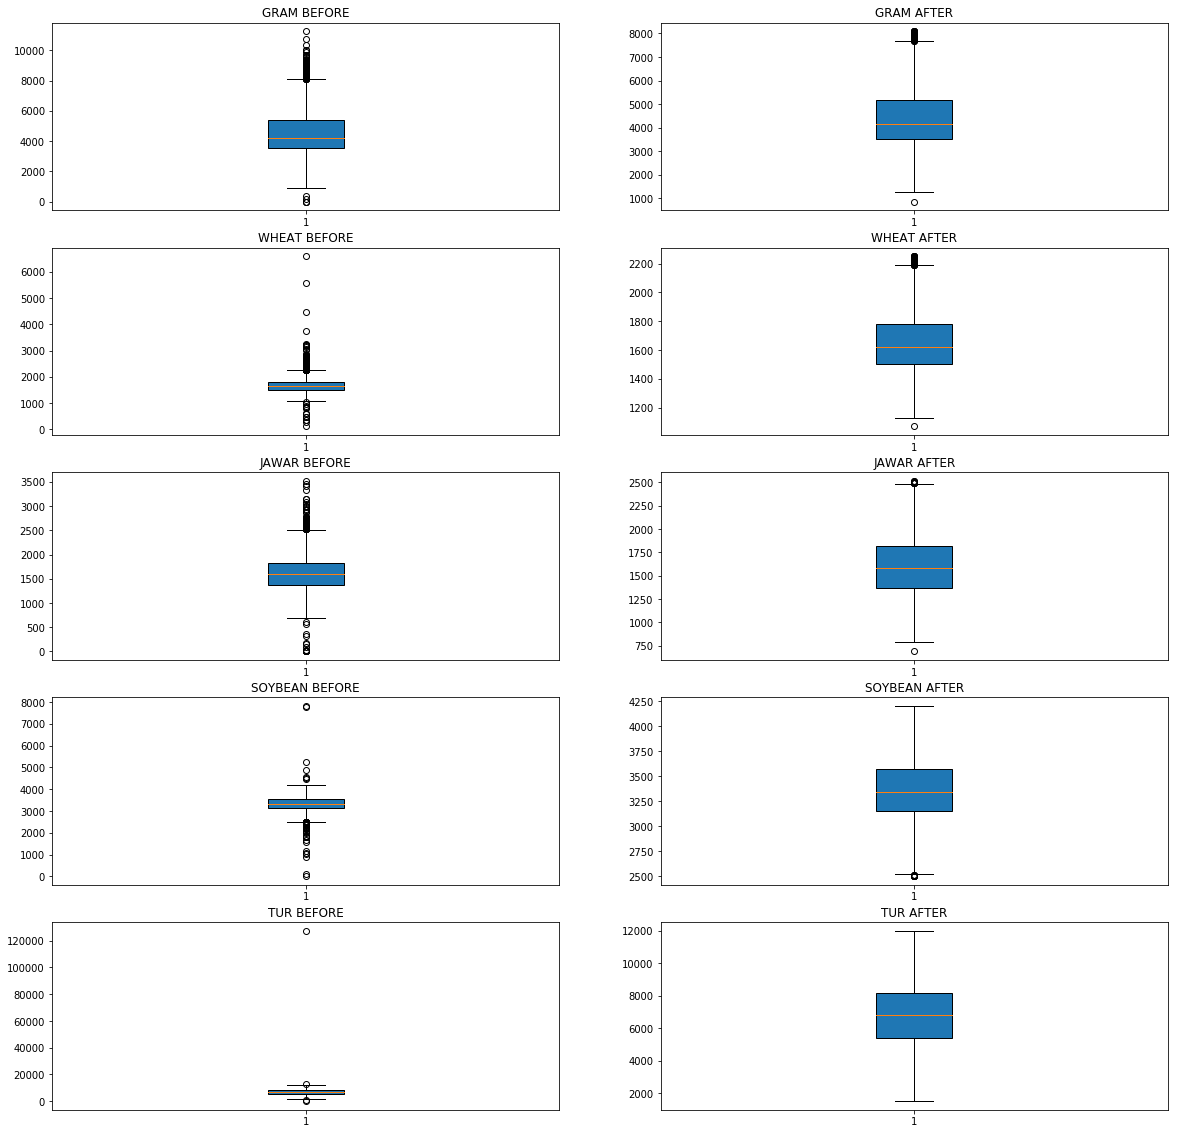

In [145]:
rcParams['figure.figsize']=20,20
figure = plt.figure()

a = mandi_data.groupby(['commodity']).get_group('gram')['modal_price']
plt.subplot(5,2,1)
plt.title("GRAM BEFORE")
plt.boxplot(a,patch_artist = True)

a = Loss_mandi_data.groupby(['commodity']).get_group('gram')['modal_price']
plt.subplot(5,2,2)
plt.title("GRAM AFTER")
plt.boxplot(a,patch_artist = True)

a = mandi_data.groupby(['commodity']).get_group('wheat(husked)')['modal_price']
plt.subplot(5,2,3)
plt.title("WHEAT BEFORE")
plt.boxplot(a,patch_artist = True)

a = Loss_mandi_data.groupby(['commodity']).get_group('wheat(husked)')['modal_price']
plt.subplot(5,2,4)
plt.title("WHEAT AFTER")
plt.boxplot(a,patch_artist = True)

a = mandi_data.groupby(['commodity']).get_group('sorgum(jawar)')['modal_price']
plt.subplot(5,2,5)
plt.title("JAWAR BEFORE")
plt.boxplot(a,patch_artist = True)

a = Loss_mandi_data.groupby(['commodity']).get_group('sorgum(jawar)')['modal_price']
plt.subplot(5,2,6)
plt.title("JAWAR AFTER")
plt.boxplot(a,patch_artist = True)

a = mandi_data.groupby(['commodity']).get_group('soybean')['modal_price']
plt.subplot(5,2,7)
plt.title("SOYBEAN BEFORE")
plt.boxplot(a,patch_artist = True)

a = Loss_mandi_data.groupby(['commodity']).get_group('soybean')['modal_price']
plt.subplot(5,2,8)
plt.title("SOYBEAN AFTER")
plt.boxplot(a,patch_artist = True)

a = mandi_data.groupby(['commodity']).get_group('pigeon pea (tur)')['modal_price']
plt.subplot(5,2,9)
plt.title("TUR BEFORE")
plt.boxplot(a,patch_artist = True)

a = Loss_mandi_data.groupby(['commodity']).get_group('pigeon pea (tur)')['modal_price']
plt.subplot(5,2,10)
plt.title("TUR AFTER")
plt.boxplot(a,patch_artist = True)
plt.savefig('Mandi_data_outlier.png',dpi=200)

# Observations-
-  We observe that there were significant outliers, observing the 'Y' scales of the images above
-  We also observe that some outliers had a small change, for commodities, example: JAWAR, GRAM (2000-3000)
-  We also observe that some outliers have massive sized outliers, example : TUR (10000)
-  Finally, we also have a few commodities, with high number of outliers, example: WHEAT,SOYBEAN, which needs to informed to the Government beacuse of the critical importance of anomaly in the prices of certain Commodities

# Plotting the MSP Price Dataset, after observing the loss of Data

In [132]:
print(len(Loss_msp_data)/len(msp_data))

0.864516129032258


# NOW, Data Loss = 14%, this is a highly significant Data Loss and hence, we cannot do this, We can either increase the range of our limits or simply use the replacement of outliers function

In [133]:
msp_data.commodity.value_counts()

jowar_hybrid              5
sesamum                   5
sunflower                 5
cotton_long staple        5
barli                     5
pigeon pea (tur)          5
wheat(unhusked)           5
wheat(husked)             5
copra (milling)_yellow    5
maize                     5
toria_yellow              5
soyabean                  5
safflower                 5
jute_yellow               5
soyabean_black            5
gr.nut kernels            5
cotton                    5
ragi_maldandi             5
masur_yellow              5
copra (ball)_yellow       5
spilt gerrn gram          5
bajri                     5
sorgum(jawar)             5
split black gram          5
mustard                   5
paddy-unhusked            5
niger-seed                5
gram_yellow               5
coconut                   5
rice(paddy-hus)           5
sugar-cane                4
sugarcane                 1
Name: commodity, dtype: int64

# Looking at this result, we observe-
-  sugar-cane and sugarcane are same, thus by a simple piece of code we replace such anomalies
-  same for soybean and soyabean in the two datasets, replace to avoid anomaly



-  and then, Finally Plotting the Data

In [135]:
No_loss_msp_data['commodity'] = No_loss_msp_data['commodity'].replace({'sugar-cane':'sugarcane'})
No_loss_msp_data['commodity'] = No_loss_msp_data['commodity'].replace({'soyabean':'soybean'})

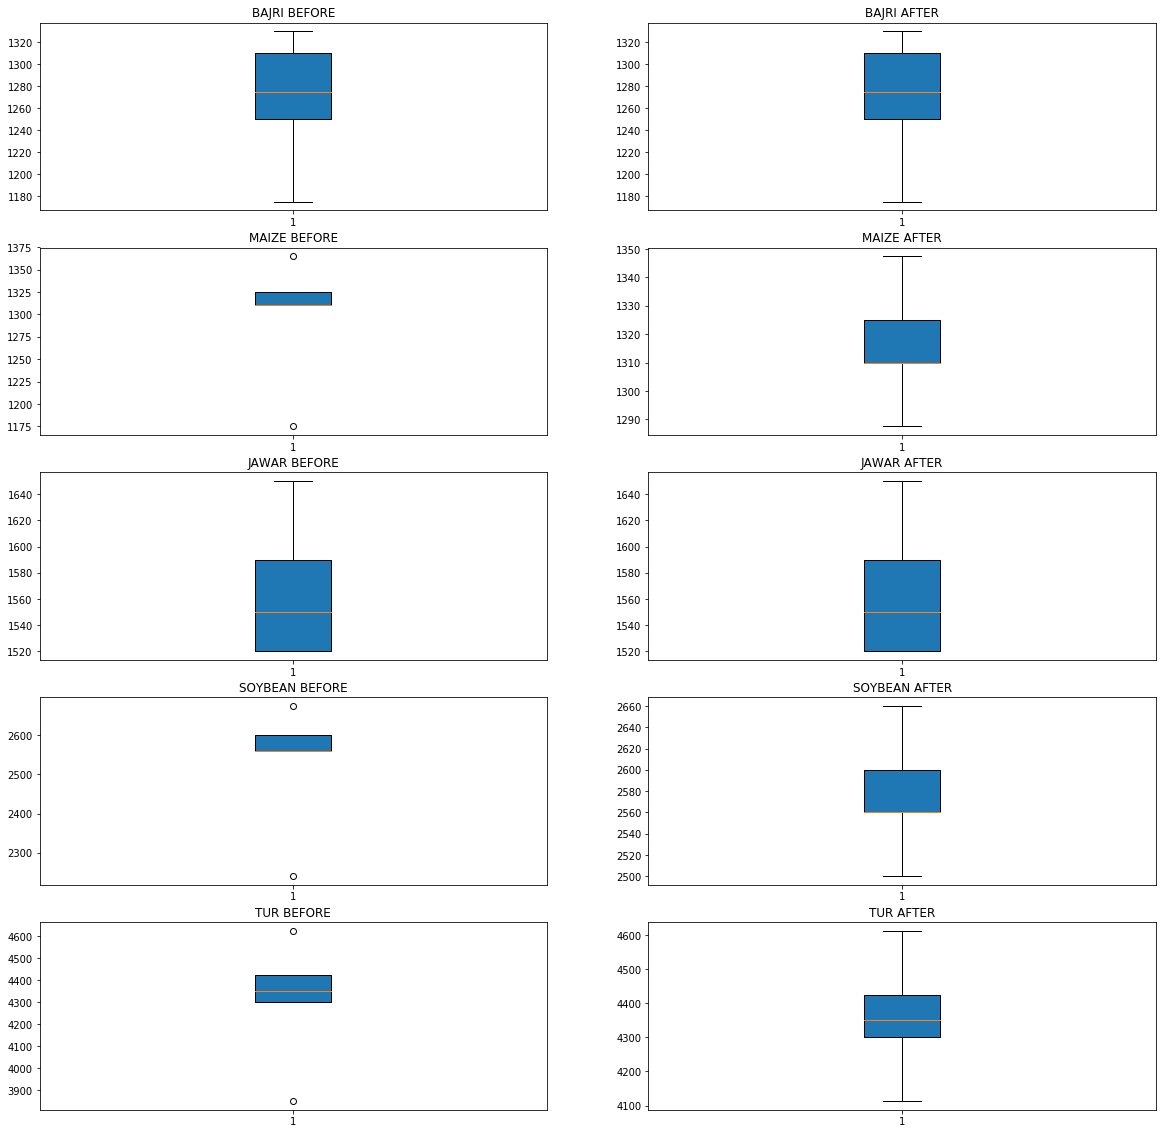

In [146]:
rcParams['figure.figsize']=20,20
figure = plt.figure()

a = msp_data.groupby(['commodity']).get_group('bajri')['msprice']
plt.subplot(5,2,1)
plt.title("BAJRI BEFORE")
plt.boxplot(a,patch_artist = True)

a = No_loss_msp_data.groupby(['commodity']).get_group('bajri')['msprice']
plt.subplot(5,2,2)
plt.title("BAJRI AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('maize')['msprice']
plt.subplot(5,2,3)
plt.title("MAIZE BEFORE")
plt.boxplot(a,patch_artist = True)

a = No_loss_msp_data.groupby(['commodity']).get_group('maize')['msprice']
plt.subplot(5,2,4)
plt.title("MAIZE AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('sorgum(jawar)')['msprice']
plt.subplot(5,2,5)
plt.title("JAWAR BEFORE")
plt.boxplot(a,patch_artist = True)

a = No_loss_msp_data.groupby(['commodity']).get_group('sorgum(jawar)')['msprice']
plt.subplot(5,2,6)
plt.title("JAWAR AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('soyabean')['msprice']
plt.subplot(5,2,7)
plt.title("SOYBEAN BEFORE")
plt.boxplot(a,patch_artist = True)

a = No_loss_msp_data.groupby(['commodity']).get_group('soybean')['msprice']
plt.subplot(5,2,8)
plt.title("SOYBEAN AFTER")
plt.boxplot(a,patch_artist = True)

a = msp_data.groupby(['commodity']).get_group('pigeon pea (tur)')['msprice']
plt.subplot(5,2,9)
plt.title("TUR BEFORE")
plt.boxplot(a,patch_artist = True)

a = No_loss_msp_data.groupby(['commodity']).get_group('pigeon pea (tur)')['msprice']
plt.subplot(5,2,10)
plt.title("TUR AFTER")
plt.boxplot(a,patch_artist = True)
plt.savefig('MSP_data_outlier.png',dpi=200)

# Observations- 
-  No major changes in data
-  Scales have changed by a small amount
-  Very few data points are extreme outliers


-  Finally Exporting the Outlier Removed Datassets


In [143]:
Loss_mandi_data.to_csv('Outlier_removed_mandi_data.csv',index=False)
No_loss_msp_data.to_csv('Outlier_removed_msp_data.csv',index= False)